Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes  
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 
par vos réponses, et remplissez les champs ci-dessous:

In [1]:
NOM = "Martinez"
PRENOM = "Maud"
GROUPE = "1"
DATE = "18/10/2019"

---

# TD 5: Statistiques avancées

## Introduction

On considère deux séries de données $xdata$ et $ydata$. 
- Calculer la moyenne, la variance et l'écart type de ces deux séries. 
- Représenter graphiquement les points $(xdata_i,ydata_i)$.
- Effectuer une régression linéaire de $ydata$ en fonction de $xdata$: tracer la droite de regression linéaire $y=ax+b$ sur le graphe précédent. 
- Afficher $a$, $b$ ainsi que la valeur du coefficient de détermination $R^2$. 

In [16]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

## Exercice 1: Choix du modèle

Pour comprendre dans quelles situations un modèle linéaire $y=ax+b$ résume de manière pertinente la relation entre une série de données et une autre, nous allons générer nous-même des jeux de données puis effectuer une régression linéaire dessus. 

Partons d'un tableau $x$ de nombres réels $x_0,x_1,x_2...x_i...x_N$ compris entre 0 et 10 ($N$=100 valeurs par exemple). Nous allons créer un tableau $y$ de réels $y_i =ax_i+b+\epsilon_i$ où $\epsilon_i$ est un nombre aléatoire.    

Ce nombre aléatoire $\epsilon_i$ sera généré à l'aide de la fonction $np.random.normal$ (voir script ci-dessous).

Faire une fonction linear_data(a,b,N,sigma) qui renverra les tableaux x et y définis ci-dessus

In [18]:
def linear_data(a,b,N=100,sigma=1):

    X=np.linspace(0,1,N)
    e=np.random.normal(0,sigma,N)
    Y= a*X+b+e
    return X,Y


On va maintenant étudier le résultat du fit de ces données par deux modèles différents : par un modèle linéaire $y = ax+b$ et par un modèle parabolique $y = px^2+ax+b$.

En utilisant la fonction curve_fit, faire un fit de 500 jeux de données aléatoires (on fixera N=100), et représenter sous forme d'histogramme les valeurs de a et b données par les deux différentes méthodes (on mettra les deux histogrammes pour les a sur le même graphe, les deux pour les b sur le même graphe). Représenter l'histogramme des valeurs de p.

Faire la manipulation pour deux valeurs de $\sigma$ ($\sigma = 2$ et $\sigma = 8$). Conclusion ?

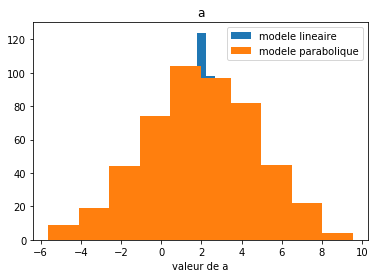

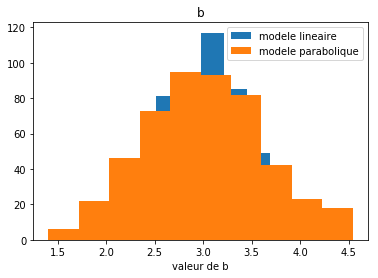

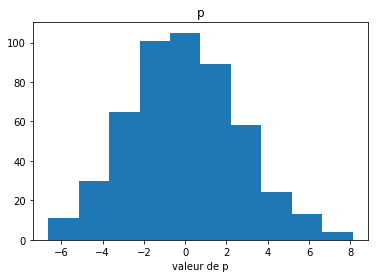

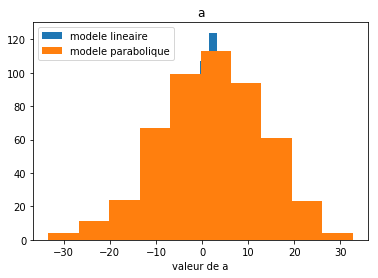

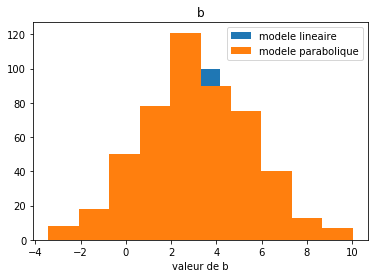

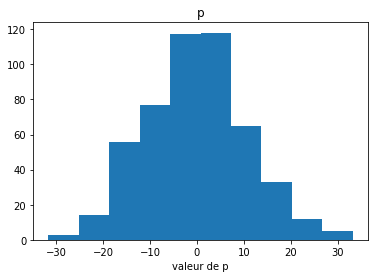

In [31]:
def lineaire(x,a,b):
    return a*x+b

def parabolique(x,p,a,b):
    return p*x**2+a*x+b

al=np.zeros(500)
bl=np.zeros(500)
ap=np.zeros(500)
bp=np.zeros(500)
p=np.zeros(500)

for sigma in [2,8]:
    
    for i in range(500):
    
        x,y =linear_data(2,3,100,sigma)
        params_l, cov_l=curve_fit(lineaire,x,y)
        al[i]=params_l[0]
        bl[i]=params_l[1]
        params_p, cov_p=curve_fit(parabolique,x,y)
        p[i]=params_p[0]
        ap[i]=params_p[1]
        bp[i]=params_p[2]
    
    
    
#bornes des bins 
    bornes = 10


#Tracé du graphe
    fig1= plt.figure()
    plt.hist(al,bins= bornes, label='modele lineaire')
    plt.hist(ap,bins= bornes, label="modele parabolique")
    plt.legend()
    plt.title('a')
    plt.xlabel('valeur de a')

    fig2= plt.figure()
    plt.hist(bl,bins= bornes, label="modele lineaire")
    plt.hist(bp,bins= bornes, label="modele parabolique")
    plt.legend()
    plt.title('b')
    plt.xlabel('valeur de b')

    fig1= plt.figure()
    plt.hist(p,bins= bornes)
    plt.title('p')
    plt.xlabel('valeur de p')

    plt.show()





Reprendre l'exercice en considérant cette fois le jeu de données suivant:
$x_i=idx$ et $y_i=px^2+b+\epsilon_i$ avec p non nul.

Tracer un exemple de fit des données par les deux méthodes ainsi que le jeu de données correspondants. Que dire ?

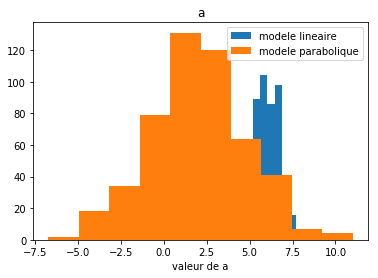

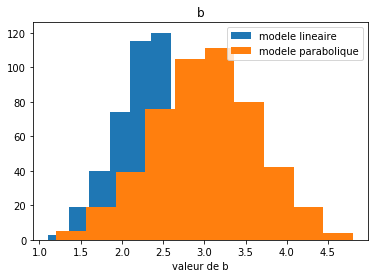

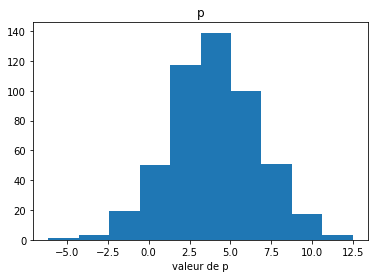

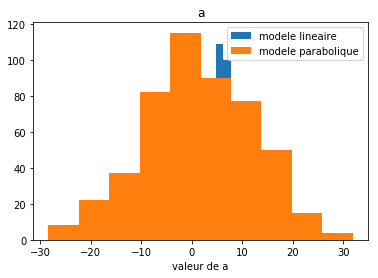

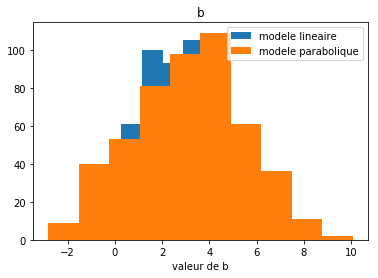

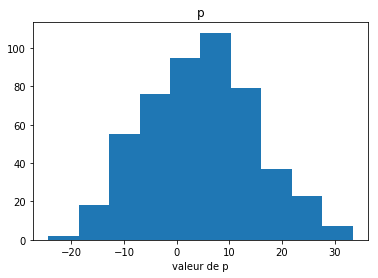

In [32]:
def parabolic_data(p,a,b,N=100,sigma=1):

    X=np.linspace(0,1,N)
    e=np.random.normal(0,sigma,N)
    Y= p*x**2+a*X+b+e
    return X,Y


al=np.zeros(500)
bl=np.zeros(500)
ap=np.zeros(500)
bp=np.zeros(500)
p=np.zeros(500)

for sigma in [2,8]:
    for i in range(500):
    
        x,y =parabolic_data(4,2,3,100,sigma)
        params_l, cov_l=curve_fit(lineaire,x,y)
        al[i]=params_l[0]
        bl[i]=params_l[1]
    
        params_p, cov_p=curve_fit(parabolique,x,y)
        p[i]=params_p[0]
        ap[i]=params_p[1]
        bp[i]=params_p[2]
    
    
    
#bornes des bins 
    bornes = 10


#Tracé du graphe
    fig1= plt.figure()
    plt.hist(al,bins= bornes, label='modele lineaire')
    plt.hist(ap,bins= bornes, label="modele parabolique")
    plt.legend()
    plt.title('a')
    plt.xlabel('valeur de a')

    fig2= plt.figure()
    plt.hist(bl,bins= bornes, label="modele lineaire")
    plt.hist(bp,bins= bornes, label="modele parabolique")
    plt.legend()
    plt.title('b')
    plt.xlabel('valeur de b')

    fig1= plt.figure()
    plt.hist(p,bins= bornes)
    plt.title('p')
    plt.xlabel('valeur de p')

    plt.show()


En fait, on peut éviter (partiellement) ce genre d'erreurs de choix de modèle en s'intéressant au contenu de la variable pcov renvoyé par la méthode pcov (matrice de covariance), qui permet de déterminer la qualité du fit pour chaque paramètre. Si cette covariance est très élevée cela veut dire que l'on ne peut pas faire confiance à la valeur du paramètre calculée : elle n'est pas significative par rapport au modèle.

## Exercice 2: résultats du forage Epica

L'analyse des bulles d'air prisonnières de la glace antarctique permet de reconstituer la température et la composition chimique de l'atmosphère il y a des milliers d'années. Le fichier Epica-tpt-co2.csv contient les températures (en °C) et la concentration en $CO_2$ (en parties par million ou ppm) pour les 800000 dernières années (années Before Present, BP, c'est à dire par rapport à 1950).
Pour ouvrir le fichier Epica-tpt-co2.csv (coma separated values), vous pourrez utiliser le petit bout de programme suivant:

In [38]:
import numpy as np
import matplotlib.pyplot as plt

file=open('data/Epica-tpt-co2.csv','rb')
q=np.loadtxt(file,delimiter=",",skiprows=1)
annee=q[:,0]
temperature=q[:,1]
co2=q[:,2]
print(co2)


[ 191.     190.794  190.61  ...,  279.1    277.9    277.755]


- Tracer sur un même graphique, ou sur deux graphiques l'un en dessous de l'autre, la température et la concentration en $CO_2$ en fonction de l'année.  
- Existe-t-il une corrélation entre le niveau de $CO_2$ et la température? 

In [39]:
temperature=temperature + 273

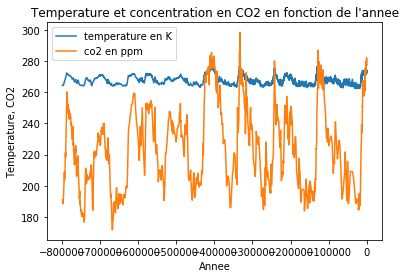

In [40]:
fig=plt.figure()
plt.plot(annee,temperature, label='temperature en K')
plt.plot(annee, co2, label='co2 en ppm')
plt.legend()
plt.title("Temperature et concentration en CO2 en fonction de l'annee")
plt.xlabel('Annee')
plt.ylabel('Temperature, CO2')
plt.show()



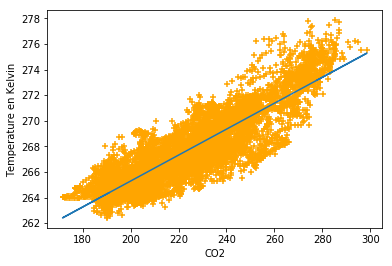

In [55]:
params, cov= curve_fit(lineaire,co2,temperature)
[a,b]=params

fig=plt.figure()
plt.scatter(co2, temperature, marker='+', color='orange')
plt.plot(co2,lineaire(co2,a,b))
plt.xlabel('CO2')
plt.ylabel('Temperature en Kelvin')
plt.show()

## Exercice 3: Exploitation de mesures expérimentales

Une thermistance est un composant électronique dont la résistance électrique $R$ varie avec la température $T$. On a réalisé les mesures suivantes.

\begin{array}{ccc}  \hline \hline
T [°C] 	& R [k \Omega] & \Delta R [k \Omega]  \\
\hline
8.0 & 19.9 &	0.1 \\
9.0 & 19.1 & 0.1 \\
10.0 & 18.3  & 0.2 \\
11.0 & 17.5 & 0.1 \\
13.0 & 16.8 & 0.1 \\
14.0 & 16.2 & 0.2 \\
15.0 & 15.5 & 0.2  \\
16.0 & 14.2 & 0.3  \\
17.0 & 13.6 & 0.3  \\
18.0 & 13.1 & 0.2  \\
19.0 & 12.6 & 0.3  \\
20.0 & 12.2 & 0.3  \\
21.0 & 11.7 & 0.2  \\
22.0 & 11.2 & 0.3  \\
23.0 & 10.8 & 0.2  \\
24.0 & 10.4 & 0.3  \\
25.0 & 10.0 & 0.4  \\
26.0 & 9.5 & 0.5  \\
27.0 & 9.0 & 0.5  \\
28.0 & 8.5 & 0.5  \\
\hline \hline
\end{array}

On suppose que l'évolution de $R$ avec la température suit une loi de la forme: 

$$ R = R_0 exp^{A/T} $$.

avec T en Kelvin (attention!).
- Déterminer les coefficients $R_0$ et $A$et donner l'incertitude sur ceux-ci. 
- Tracer les points expérimentaux avec leurs incertitudes, puis tracer sur le même graphe la courbe correspondant au modèle.
- Tracer une courbe représentant les résidus. 
- Calculer le $\chi_{\nu}^2$ réduit. 





In [44]:
#Voici les données dans le tableau
#Jeu de données simulées
Tdata=np.array([8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0])
Rdata=np.array([19.9, 19.1, 18.3, 17.5, 16.8, 16.1, 15.5, 14.8, 14.3, 13.7, 13.1, 12.7, 12.1, 11.7, 11.2, 10.8,10.4, 10.0, 9.6, 9.3, 8.9])
DRdata=np.array([0.1, 0.1, 0.2, 0.1, 0.1,0.2,0.2,0.3,0.3,0.2,0.3,0.3,0.2,0.3,0.2,0.3,0.4,0.5,0.5,0.5,0.5])

In [45]:
Tdata= Tdata+273

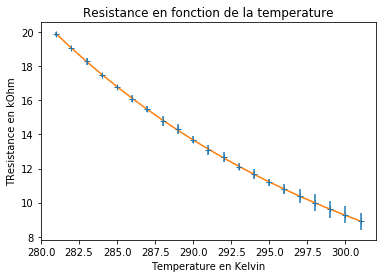

In [59]:
def loi_therm(T,Ro,A):
    return Ro*np.exp(A/T)

params, cov= curve_fit(loi_therm,Tdata,Rdata, sigma=DRdata)
[Ro,A]=params
DRo = cov[0,0]
DA = cov[1,1]
print

#Tracé du graphe
fig=plt.figure()
plt.errorbar(Tdata, Rdata, yerr= DRdata, linestyle='None', marker='+')
plt.plot(Tdata,loi_therm(Tdata,Ro,A))
plt.title('Resistance en fonction de la temperature')
plt.xlabel('Temperature en Kelvin')
plt.ylabel('TResistance en kOhm')
plt.show()


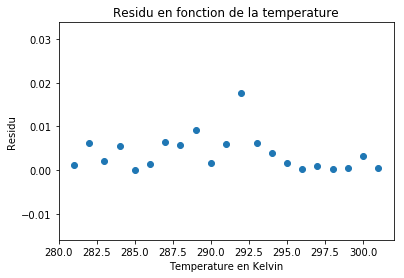

In [60]:
residu=(Rdata-loi_therm(Tdata,Ro,A))**2/DRdata
#Tracé du graphe
fig=plt.figure()
plt.scatter(Tdata,residu)
plt.title('Residu en fonction de la temperature')
plt.xlabel('Temperature en Kelvin')
plt.ylabel('Residu')
plt.show()

In [63]:
N=np.shape(Tdata)[0]
Xi=(1/N-2)*np.sum(residu)
print(Xi)


-0.161430838882


## Exercice 4: Température moyenne à la surface du globe


On souhaite regarder l'évolution de la température à la surface de la Terre sur la période de 1880 à nos jours (les données sont publiques et extraites du site de la NASA, accessibles à l'adresse https://data.giss.nasa.gov/gistemp/ : ils y expliquent quelques détails du calcul de l'estimateur). Pour cela on dispose grâce au code ci-dessous d'un tableau années des années 1880 à 2018 et d'un tableau temperature_mois à deux dimensions (la première est le numéro du mois de l'année et la deuxième le numéro de l'année) contenant un estimateur de la température globale de la Terre durant le mois de l'année en question.

In [64]:
import numpy as np
import scipy.optimize as optimization
import matplotlib.pyplot as plt



file=open('data/data_climate_global.csv','rb')
q=np.loadtxt(file, delimiter=",")
annees = q[0]
temperature_mois = q[1:13]

Afficher sur un même graphique les courbes représentant les températures moyennes des mois de janvier, de mai et de septembre au cours de la plage d'années en question.
Afficher sur un même graphique les courbes représentant les variations mensuelles des températures au cours des années 1880, 1950 et 2000.

In [80]:
print(temperature_mois)

[[ 11.83  11.81  12.17 ...,  13.17  13.03  12.82]
 [ 12.06  12.17  12.45 ...,  13.67  13.43  13.14]
 [ 12.91  13.04  13.05 ...,  14.36  14.15  13.89]
 ..., 
 [ 13.87  13.89  13.87 ...,  14.97  15.    15.1 ]
 [ 12.79  12.82  12.84 ...,  13.9   13.88  13.82]
 [ 12.03  12.14  11.85 ...,  13.05  13.14  13.11]]


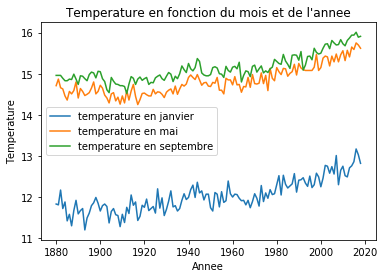

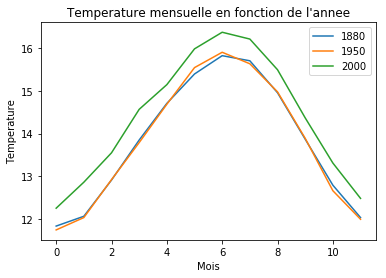

In [88]:
janv=temperature_mois[0]
mai=temperature_mois[4]
sept=temperature_mois[8]

#mois=[janv,fevr,mars,avril,mai,juin,juil,aout,sept,octo,nov,dec]
mois=range(12)
a1880=np.transpose(temperature_mois)[0]
a1950=np.transpose(temperature_mois)[70]
a2000=np.transpose(temperature_mois)[120]

#Tracé du graph
fig1=plt.figure()
plt.plot(annees,janv, label='temperature en janvier')
plt.plot(annees,mai, label='temperature en mai')
plt.plot(annees,sept, label='temperature en septembre')
plt.legend()
plt.title("Temperature en fonction du mois et de l'annee")
plt.xlabel('Annee')
plt.ylabel('Temperature')


fig2=plt.figure()
plt.plot(mois,a1880, label='1880')
plt.plot(mois,a1950, label='1950')
plt.plot(mois,a2000, label='2000')
plt.legend()
plt.title("Temperature mensuelle en fonction de l'annee")
plt.xlabel('Mois')
plt.ylabel('Temperature')

plt.show()

On souhaite s'intéresser à l'evolution de la température moyenne sous la forme d'un modèle simpliste $T(a,m) = T_m + b_m (a-1980)$ où m est le numéro du mois et a le numéro de l'année. Afficher les valeurs de $T_m$ et $b_m$ en fonction de m

In [ ]:
def Temp_moy(a,m):
    

On souhaite modéliser la valeur de la température moyenne par la formule suivante : $T_m = T_{moy} - A \cos(\frac{\pi}{6} m)$. D'où vient le choix de $\frac{\pi}{6}$ dans la formule ? Effectuer un fit et afficher la courbe expérimentale contre le fit.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Remarque : on aurait pu faire simultanément le fit en mois et années avec la formule précédente en fixant un b_m indépendant de m, en adaptant la méthode de l'exercice suivant.

## Exercice 5 : Position et taille d'un faisceau laser sur une caméra

Un faisceau laser est incident sur une caméra numérique (on suppose que la caméra est protégée par des filtres!). Sur l'image enregistrée on observe une tache lumineuse. 

On souhaiterait extraire automatiquement de cette image les positions horizontale ($x_0$) et verticale($y_0$) du centre de la tache lumineuse ainsi que sa largeur $w_x$ et $w_y$ suivant les directions horizontales et verticales. 

### 5.1 Chargement de l'image à étudier

Cette image ('image_laser.tif') peut être téléchargée sur dokeos et copiée dans votre répertoire de travail. 

L'image peut être ouverte par Python à l'aide du script suivant. Une fois ouverte, elle est stockée dans la mémoire de l'ordinateur sous la forme d'un tableau 2D de réels appelé ici $image1$. 

Le nombre de lignes ($i=0,1....N_x$)et de colonnes ($j=0,1....N_y$) dans ce tableau correspond aux nombres de pixels dans les directions horizontale et verticale de l'image. La valeur $I(i,j)$ contenue dans la case $(i,j)$ du tableau est un nombre proportionnel aux nombre de photons reçu par le pixel $(i,j)$ de la caméra: on l'appelera "éclairement du pixel".

- Ouvrir puis afficher l'image enregistrée par la caméra. Quelles sont les dimensions (en pixels) de l'image ? 

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt

fname1='data/image_laser.tif'
image1=img.imread(fname1,format='tif')

plt.figure()
plt.imshow(image1)
plt.colorbar()
plt.show()

Nx,Ny=image1.shape
print('Dimensions de l image :',Nx,'X',Ny,'pixels')

### 5.2 Fonction modèle


Pour extraire automatiquement les positions  horizontale ($x_0$) et verticale($y_0$) du centre de la tache lumineuse ainsi que ses largeurs horizontale et verticales $w_x$ et $w_y$ on va modéliser la tache lumineuse par une fonction gaussienne à deux dimensions. 

On assimile l'image à trois séries de données: les abscisses $x_{ij}$ et les ordonnées $y_{ij}$ des pixels et leurs éclairements $I_{ij}$. On va modéliser ces séries par un modèle de la forme $I=f(x,y)$ en utilisant une régression non-linéaire des moindres carrés. Les paramètres de la fonction $f$ obtenus par ajustement moindre carré permettront d'en déduire $x_0$, $y_0$, $w_x$ et $w_y$.      

La tache lumineuse sera modélisée par une fonction gaussienne $I=f(x,y)$ de la forme suivante:

$$I=f(x,y)=A_0 exp(-\frac{(x-x_0)^2}{w_x^2}-\frac{(y-y_0)^2}{w_y^2})+e_0$$

- Créer une fonction $gaussienne$ que calcule la fonction $f(x,y)$ précédente.  
- Représenter graphiquement $I=f(x,y)$ en fonction de x et y. 


On pourra s'inspirer de l'exemple ci-dessous (quelles sont les dimensions de X, Y et Z, et que représentent-ils ?). 

In [ ]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

def fonction_modele(x,y, a0,a1,a2):
    res=a0*x**2+a1*y**2+a2
    return res

x = np.linspace(0, 200, 201)
y = np.linspace(0, 200, 201)
X,Y = np.meshgrid(x, y)

Z=fonction_modele(X,Y,1.0,-2.0,10.0)
plt.figure(1)
plt.pcolor(X,Y,Z)
plt.colorbar()
plt.show()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### 5.3 Création d'une image  test

Afin de tester notre procédure d'ajustement moindre carré, nous allons créer, à partir de la fonction précédente, une fonction "bruitée" qui simulera une image expérimentale. 
- Ecrire une fonction $gaussiennebruitee$, qui est la somme de la fonction $gaussienne$ et d'un nombre aléatoire tiré au sort pour chaque pixel.
- afficher le résultat obtenu. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Fit de la fonction test

Effectuer un ajustement de l'image bruitée par une fonction $gaussienne$.
- choisir des parametres initiaux "raisonnables" ($e_0$ égal au minimum de I, $x_0$, $y_0$ au milieu de l'image, taille de 10 pixels...)
- Retrouve t-on les paramètres $x_0$, $y_0$, $w_x$ et $w_y$ avec lesquels on avait calculé l'image de test ? 
A partir de quelle ecart-type sur le bruit a-t-on un écart significatif ? 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Test sur une vraie image

Effectuer un ajustement de l'image expérimentale par la fonction $gaussienne$. 
- Afficher les valeurs de  $x_0$, $y_0$, $w_x$ et $w_y$ obtenues grâce à cet ajustement (ne pas oublier l'incertitude). 
- Afficher en rouge sur l'image les points de coordonnées $(x0,y0)$ ainsi que les points $(x0 \pm dx0,y0 \pm dy0)$. On utilisera la fonction scatter(vx,vy,color='r',s=50) qui permet d'afficher les points de coordonnées (vx[i],vy[i])

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()